## PRCP-1013-WalkRunClass

## Raajavignesh

### About Data:
* "0": walking
* "1": running

In [1]:
# Including libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# load dataset
df=pd.read_csv('walkrun.csv')
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
#creating column names to reindex
column_names=['date','time','username','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','wrist','activity',]

In [4]:
df=df.reindex(columns=column_names)

In [5]:
#now the target data 'activity' is moved to last
df.head()

,date,time,username,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,wrist,activity
0,2017-6-30,13:51:15:847724020,viktor,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0,0
1,2017-6-30,13:51:16:246945023,viktor,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0,0
2,2017-6-30,13:51:16:446233987,viktor,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0,0
3,2017-6-30,13:51:16:646117985,viktor,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0,0
4,2017-6-30,13:51:16:846738994,viktor,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0,0


In [6]:
print('The dataset contains\n' + str((df['wrist'].value_counts())[0]) + 
      ' data samples collected on the left wrist\n' + str((df['wrist'].value_counts())[1]) + 
      ' data samples collected on the right wrist')

The dataset contains
42330 data samples collected on the left wrist
46258 data samples collected on the right wrist


In [7]:
print('Dataset contains\n' + str(pd.value_counts(df['activity'].values)[0]) + ' "walk" data samples\n' 
      + str(pd.value_counts(df['activity'].values)[1]) + ' "run" data samples')

Dataset contains
44223 "walk" data samples
44365 "run" data samples


In [8]:
# checking the vunique values in usename variable
df.username.value_counts()

viktor    88588
Name: username, dtype: int64

In [9]:
# shape(rows,columns) of the dataset
df.shape

(88588, 11)

In [10]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   acceleration_x  88588 non-null  float64
 4   acceleration_y  88588 non-null  float64
 5   acceleration_z  88588 non-null  float64
 6   gyro_x          88588 non-null  float64
 7   gyro_y          88588 non-null  float64
 8   gyro_z          88588 non-null  float64
 9   wrist           88588 non-null  int64  
 10  activity        88588 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [11]:
# list out numerical and categorical varaibles separately
numerical_float_features = df.select_dtypes(include=[np.float64]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [12]:
# Checkig null values count 
df.isnull().sum()

date              0
time              0
username          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
wrist             0
activity          0
dtype: int64

In [13]:
# checking unique values in target varaible
df.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

### Visuvalization of Data

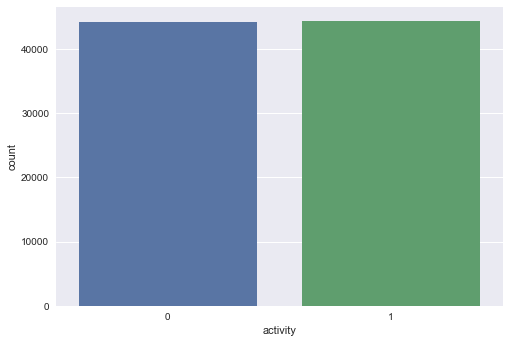

In [14]:
# Distribution of the activity
ax = sns.countplot(x="activity", data=df)

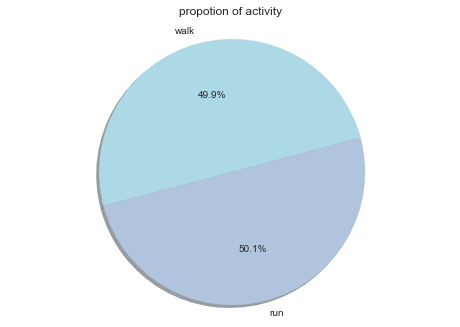

In [15]:
# pie chart for activity
my_labels = 'walk','run'
my_colors = ['lightblue','lightsteelblue']
Tasks = [44223,44365]
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors)
plt.axis('equal')
plt.title("propotion of activity")
plt.show()

Text(0.5, 1.0, 'Proportion of wrist')

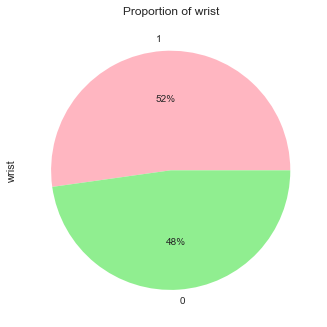

In [16]:
# pie chart for wrist
colors = ['lightpink','lightgreen']
df.wrist.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of wrist')

acceleration_x vs activity


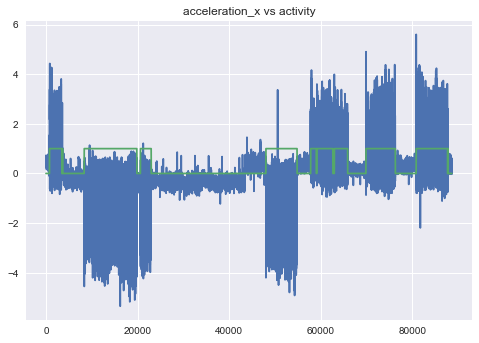

acceleration_y vs activity


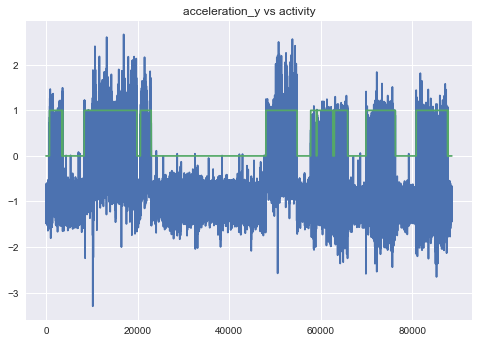

acceleration_z vs activity


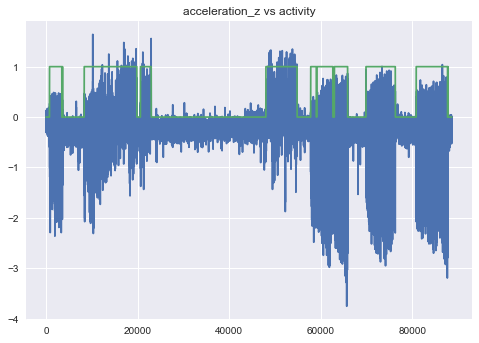

gyro_x vs activity


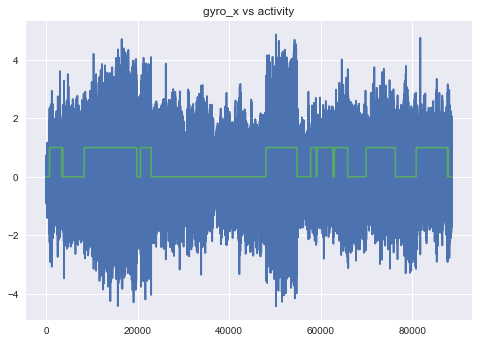

gyro_y vs activity


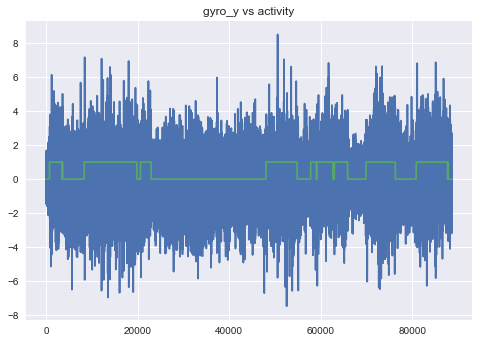

gyro_z vs activity


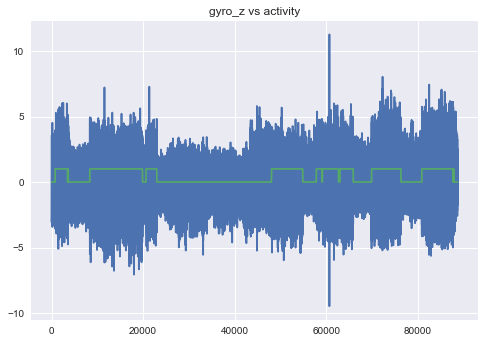

In [17]:
# grpah shows relationship b/w features with activity
for x in numerical_float_features:
    print(x + ' vs activity')
    a=df['activity']
    df[x].plot()
    a.plot()
    plt.title(x + ' vs activity')
    plt.show()

Observations from "activity" split accelerometer and gyroscope recordings:

"acceleration_x", "acceleration_z" show clear differentiation between walking and running, with running yielding much higher(+ve, -ve based on the wrist) values.
"acceleration_y" shows some separation but not as pronounced as the two other dimensions.
"gyroscope" data on the other hand look quite similar for walking and running.
For predictive analysis, acceleration_x could be the most important feature because of it's data distribution quality and ability to differentiate "activity". Although acceleration_x, acceleration_z do show sepration, they suffer from some inconsistencies in data distribution which might hamper their prominence. It'll be interesting to see the effects of gyroscope data.

In predictive analysis section, I'll be dealing with topics such as feature scaling, pca, prediction algorithm testing/efficiency.

# Distribution plots of accelerometer and gyroscope data

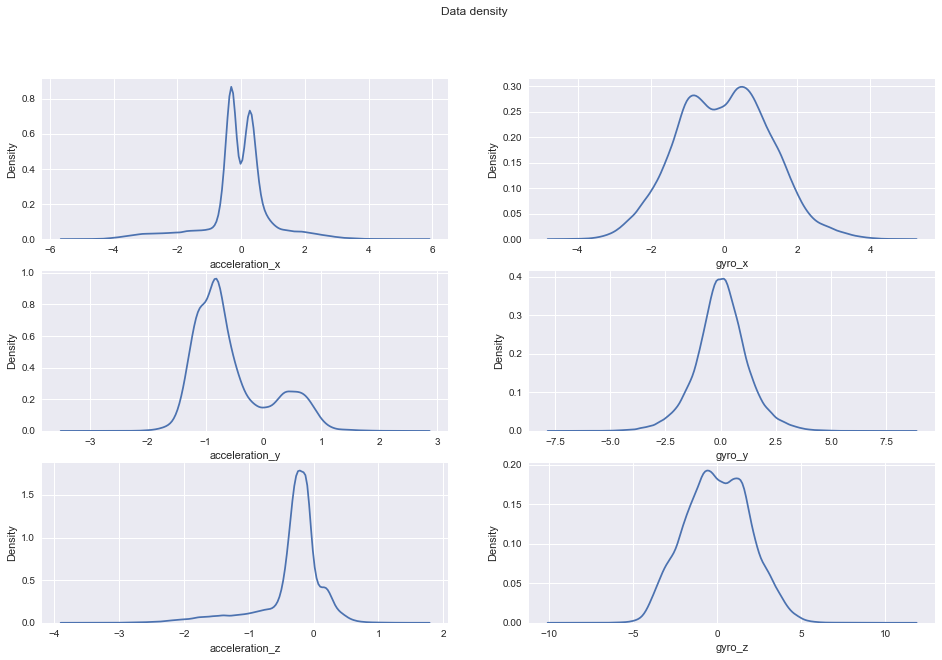

In [18]:
df_sorted = df.copy()
df_sorted_viz =  df_sorted.copy()
fig_kde, ax_kde = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
ax_num = 0
for each_col in df.columns.values[3:9]:
    g_kde = sns.kdeplot(df_sorted_viz[each_col], ax=ax_kde[ax_num % 3][ax_num // 3])
    ax_num += 1
fig_kde.suptitle("Data density")
#fig_kde.tight_layout()
fig_kde.show()

Observations on data distribution of device data:

For x-axis, accelerometer data is roughly symmetric and the double peak pattern is because of two "wrist" values. Same behavior is noticed in gyroscope data.
For y-axis, gyroscope data has normal distribution with mean = 0. Accelerometer data on the other hand looks skewed, and has the most inconsistent distribution among all the ratio features.
For z-axis, gyroscope data looks symmetric. Accelerometer data is slightly skewed but not as much as y-axis data.

# Analysis of datetime feature

In [19]:
df_date_reformat = df["date"].str.split("-", expand=True)

#time column reformat
df_time_reformat = df["time"].str.split(":", expand=True)

#join formatted date and time dataframes
df_date_time_reformat = pd.concat([df_date_reformat, df_time_reformat], axis=1)
df_date_time_reformat.columns = ["year","month", "day", "hour", "minute", "second", "ns"] #rename columns

#create a datetime object
df_date_time_obj = pd.to_datetime(df_date_time_reformat)

In [20]:
#add datetime object to a new dataframe and set it as index
df_sorted["datetime"] = df_date_time_obj
df_sorted.set_index("datetime", inplace=True)
df_sorted.drop(axis=1, columns=["username"], inplace=True) # drop "username" column
print("*** last row timestamp before sorting ***")
print(df_sorted.index[-1])
#sort df_sorted data by "datetime" index
df_sorted.sort_index(inplace=True)
print("*** last row timestamp after sorting ***")
print(df_sorted.index[-1])

*** last row timestamp before sorting ***
2017-07-09 20:09:16.117410004
*** last row timestamp after sorting ***
2017-07-17 20:16:03.684989988


In [21]:
print("*** dataframe with datetime index ***")
df_sorted.head()

*** dataframe with datetime index ***


,date,time,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,wrist,activity
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0,0
2017-06-30 13:51:16.246945023,2017-6-30,13:51:16:246945023,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0,0
2017-06-30 13:51:16.446233987,2017-6-30,13:51:16:446233987,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0,0
2017-06-30 13:51:16.646117985,2017-6-30,13:51:16:646117985,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0,0
2017-06-30 13:51:16.846738994,2017-6-30,13:51:16:846738994,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0,0


In [22]:
#quick insight using pandas methods
print("Start time of data recording ->", df_sorted.index.min())
print("End time of data recording ->", df_sorted.index.max())
print("Number of days of data collection ->", df_sorted.index.day.nunique())
print("Days of data collection ->", df_sorted.date.unique())

Start time of data recording -> 2017-06-30 13:51:15.847724020
End time of data recording -> 2017-07-17 20:16:03.684989988
Number of days of data collection -> 12
Days of data collection -> ['2017-6-30' '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7'
 '2017-7-9' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17']


In [23]:
from matplotlib.ticker import FormatStrFormatter

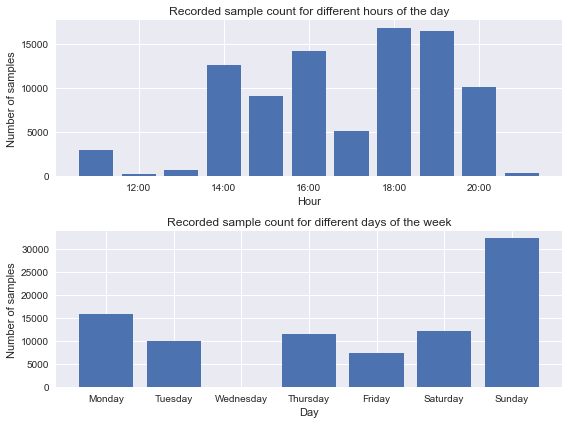

In [24]:
#visualization of user activity pattern
f, ax =  plt.subplots(ncols=1, nrows=2, figsize = (8,6))

#sample count vs hour of day
arr_hr = np.unique(df_sorted.index.hour, return_counts = True)
ax[0].bar(arr_hr[0], arr_hr[1])
ax[0].set_title("Recorded sample count for different hours of the day")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of samples")
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%d:00'))

#sample count vs day of week
arr_day = np.unique(df_sorted.index.dayofweek, return_counts = True)
ax[1].bar(arr_day[0], arr_day[1])
ax[1].set_title("Recorded sample count for different days of the week")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of samples")
ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

f.tight_layout()
f.show()

Observations on data collection timline:

Hours of day: Most of the samples were recorded between 2pm and 8pm with the highest count coming from 6pm. 
The dip in sample count at 5pm looks out of place and worth noting.
Days of week: Sunday dominates the sample count which could be due to it being no work day.
Rest of the days have similar sample counts except for Wednesday which has zero.

# Visualizing "activity" split accelerometer and gyroscope data

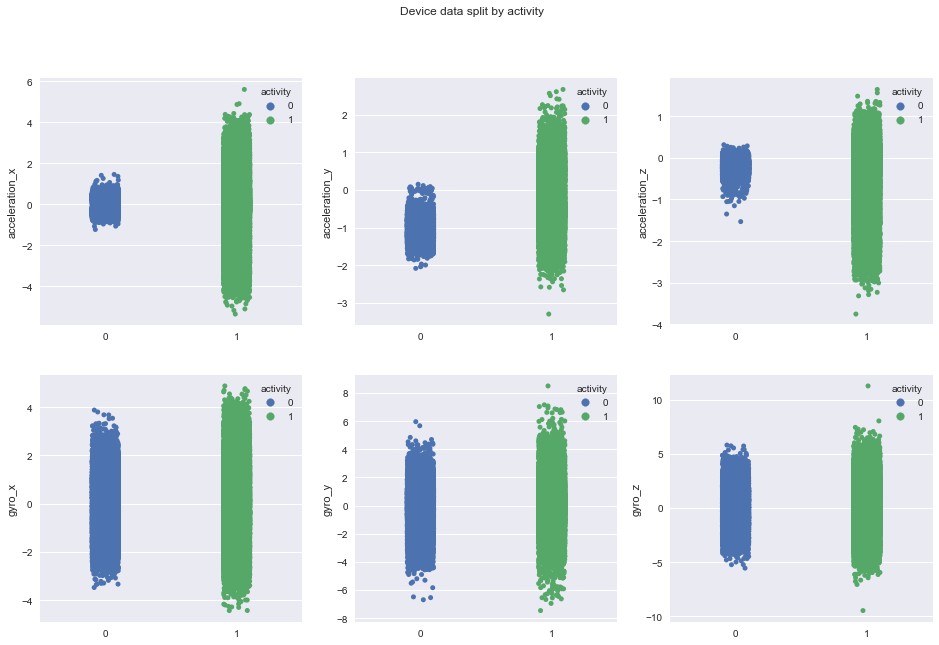

In [25]:
fig_str, ax_str = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig_str.suptitle("Device data split by activity")    
ax_num = 0
for each_col in df.columns.values[3:9]:
    g_str = sns.stripplot(x = "activity", y = each_col, hue = "activity", ax=ax_str[ax_num // 3][ax_num % 3], data = df_sorted_viz)
    ax_num += 1
    g_str.set_xlabel("")
#fig_str.tight_layout()
fig_str.show()

Observations from "activity" split accelerometer and gyroscope recordings:

"acceleration_x", "acceleration_z" show clear differentiation between walking and running, with running yielding much higher(+ve, -ve based on the wrist) values. "acceleration_y" shows some separation but not as pronounced as the two other dimensions. "gyroscope" data on the other hand look quite similar for walking and running. For predictive analysis, acceleration_x could be the most important feature because of it's data distribution quality and ability to differentiate "activity". Although acceleration_x, acceleration_z do show sepration, they suffer from some inconsistencies in data distribution which might hamper their prominence. It'll be interesting to see the effects of gyroscope data.

In predictive analysis section, I'll be dealing with topics such as feature scaling, pca, prediction algorithm testing/efficiency.

# Numerical Data Distribution

In [26]:
SENSOR_DATA = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [27]:
# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

In [28]:
# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

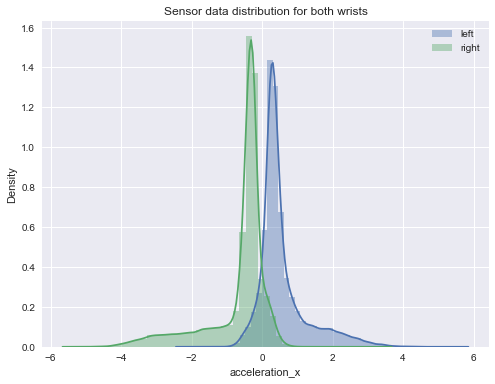

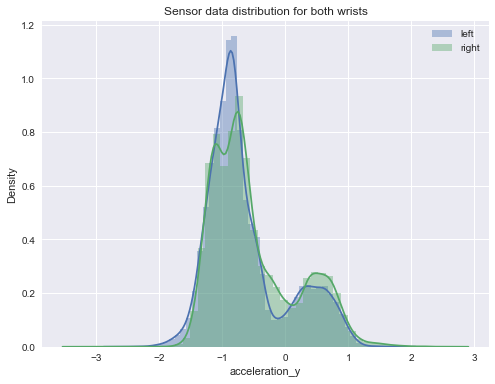

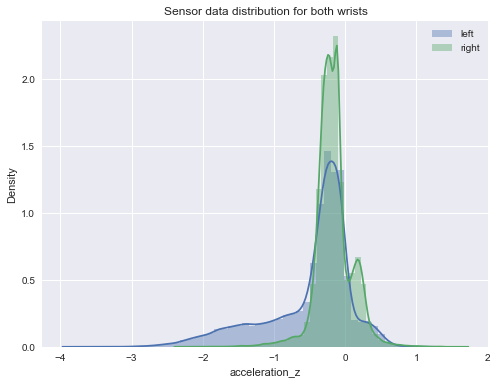

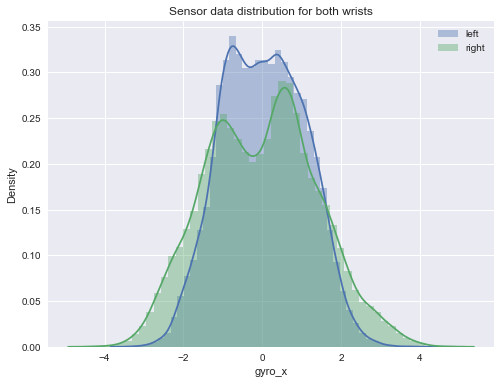

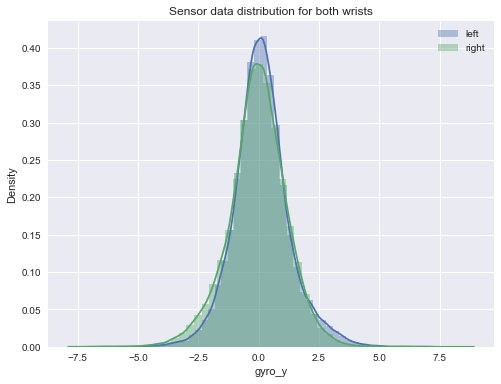

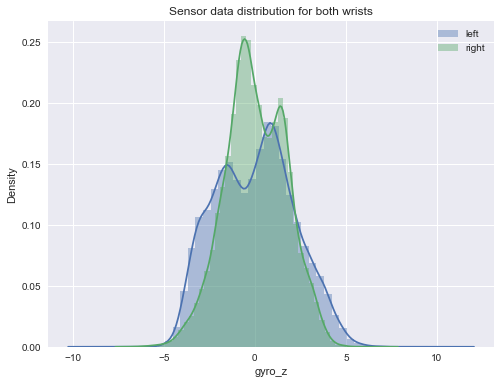

In [29]:
#SENSOR_DATA = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
for c in SENSOR_DATA:
    plt.figure(figsize=(8,6))
    plt.title("Sensor data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show()

Doesn't show any separation b/w left and right wrist almost they values are same.

array([[<AxesSubplot:title={'center':'acceleration_x'}>,
        <AxesSubplot:title={'center':'acceleration_y'}>,
        <AxesSubplot:title={'center':'acceleration_z'}>,
        <AxesSubplot:title={'center':'gyro_x'}>],
       [<AxesSubplot:title={'center':'gyro_y'}>,
        <AxesSubplot:title={'center':'gyro_z'}>,
        <AxesSubplot:title={'center':'wrist'}>,
        <AxesSubplot:title={'center':'activity'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

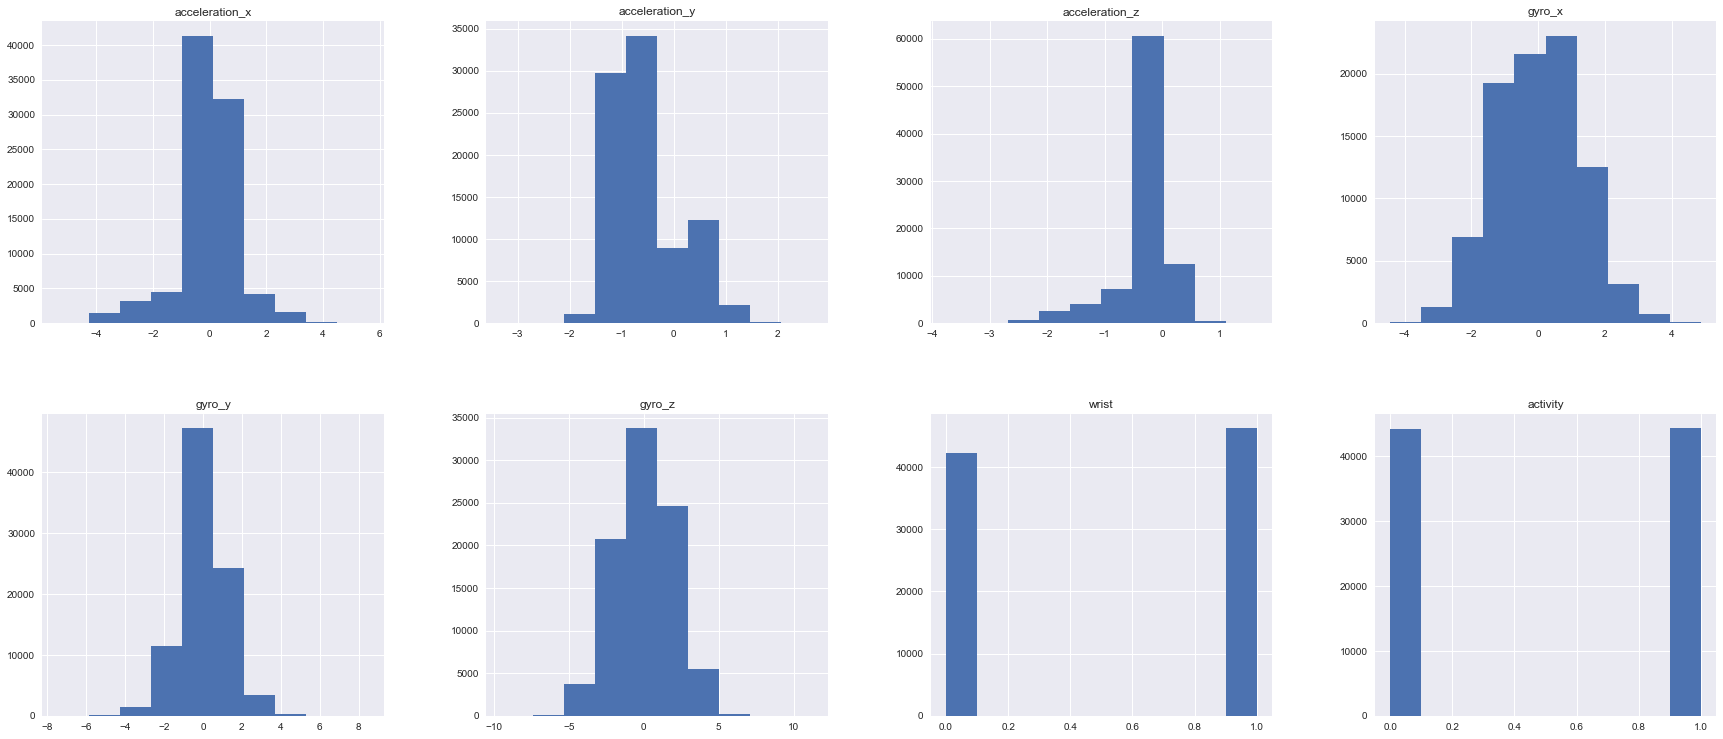

In [30]:
# plottig a histogram
df.hist(figsize=(30,20), grid=True, layout=(3, 4), bins = 10)

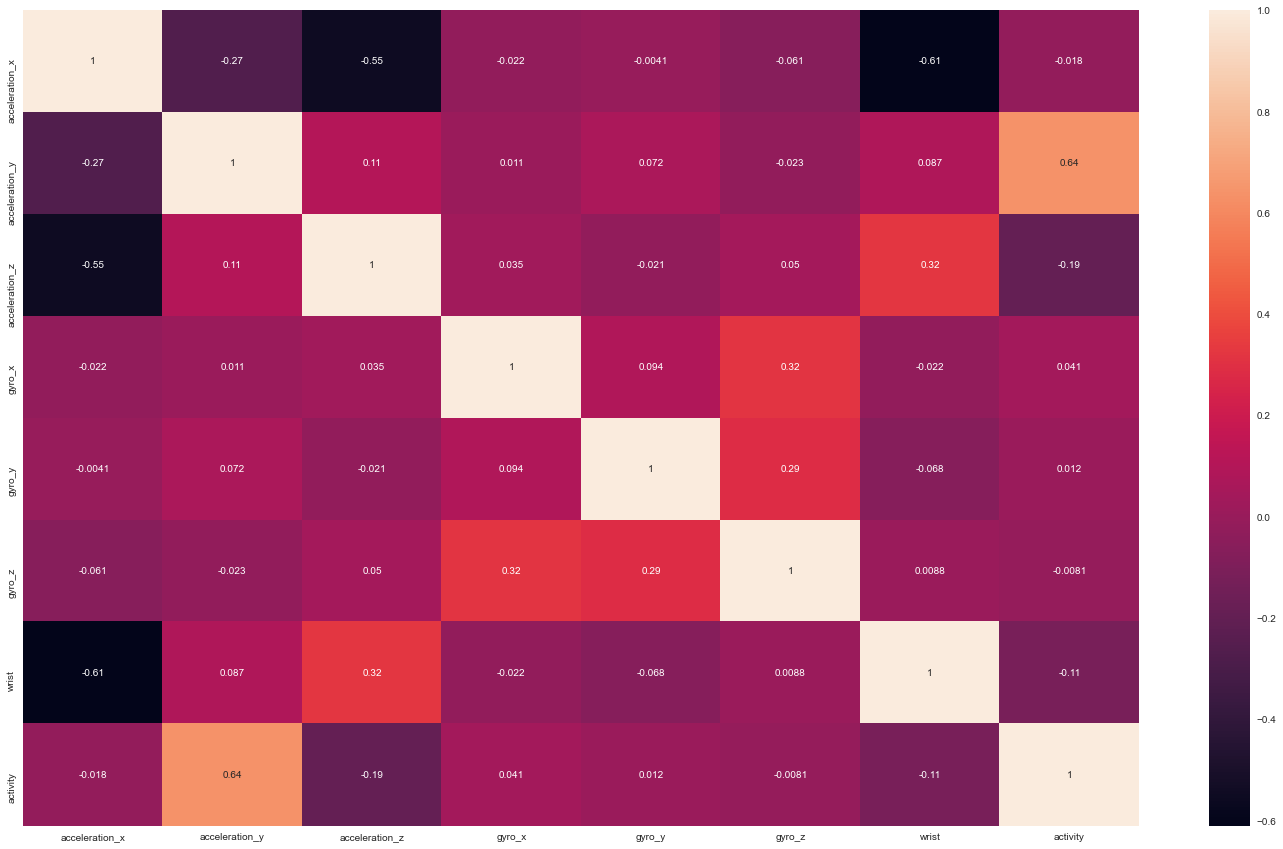

In [31]:
# plotting heat map

plt.figure(figsize =(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Machine Learning Approach

In [32]:
X=df.iloc[:,:-1]

In [33]:
# copying target varaible into y 
y=df['activity']

In [34]:
X.head()

,date,time,username,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,wrist
0,2017-6-30,13:51:15:847724020,viktor,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0
1,2017-6-30,13:51:16:246945023,viktor,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0
2,2017-6-30,13:51:16:446233987,viktor,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0
3,2017-6-30,13:51:16:646117985,viktor,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0
4,2017-6-30,13:51:16:846738994,viktor,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [36]:
# head of the dataset 
df.head()

,date,time,username,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,wrist,activity
0,2017-6-30,13:51:15:847724020,viktor,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0,0
1,2017-6-30,13:51:16:246945023,viktor,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0,0
2,2017-6-30,13:51:16:446233987,viktor,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0,0
3,2017-6-30,13:51:16:646117985,viktor,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0,0
4,2017-6-30,13:51:16:846738994,viktor,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0,0


Here we drop username,date and time features these are doesnt show any effect on activity(target variable) or model performance.

In [37]:
# dropping username beacuase it doesnt effect on accuracy score
X.drop(['username','date','time'],axis=1,inplace=True)

In [38]:
# Train and Test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=45)

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [40]:
# function for martices performance
def performance_matrices(model, X_data, y_data, y_predicted): 
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [41]:
# function for the drawing roc curve
def draw_auc_roc_1(model, X_data, y_data, line_color, title):
    probs = model.predict(X_data)
    #probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

In [42]:
# function for the drawing roc curve
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

# Logistic Regression

In [43]:
# Applyig the Logistic Regression Model to the Data

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
# predicting X test values with Logistic Regression model
ypredictlr = lr.predict(X_test)

In [45]:
# Accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ypredictlr)

0.8572267124215469

In [46]:
# confusion matrix 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(y_test,ypredictlr)

array([[10112,  1014],
       [ 2148,  8873]], dtype=int64)

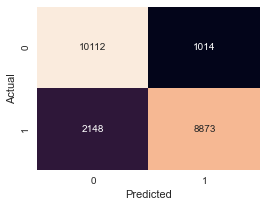

In [47]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictlr, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix,annot=True, cbar = False,fmt="d")
plt.show()

In [48]:
# classification report
lr_report=classification_report(y_test,ypredictlr)
print(lr_report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     11126
           1       0.90      0.81      0.85     11021

    accuracy                           0.86     22147
   macro avg       0.86      0.86      0.86     22147
weighted avg       0.86      0.86      0.86     22147



In [49]:
# performance metrics 
lr_met,lr_test_accu,lr_test_precision,lr_test_recall,lr_test_f1 = performance_matrices(lr, X_test, y_test, ypredictlr)
print ('Logistic_test_accu ',lr_test_accu)
print ('Logistic_test_precision ',lr_test_precision)
print ('Logistic_test_recall ',lr_test_recall)
print ('Logistic_test_f1 ',lr_test_f1)

Logistic_test_accu  0.86
Logistic_test_precision  0.9
Logistic_test_recall  0.81
Logistic_test_f1  0.85


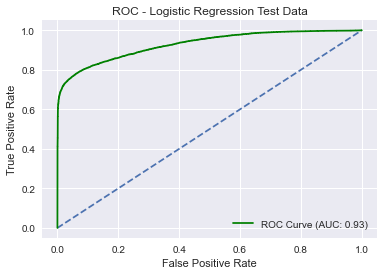

logit_test_auc 0.93


In [50]:
# Roc curve for test data
lr_test_auc, lr_test_fpr, lr_test_tpr = draw_auc_roc(lr, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', round(lr_test_auc,2))

# Random Forest

In [51]:
# Applyng Random Forest to walkrun dataset
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=120,
                             max_depth=25,
                             random_state=25
                            )
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=120, random_state=25)

In [52]:
# predicting y values for x test using RFC
ypredictrfc = rfc.predict(X_test)

In [53]:
# Accuracy score
accuracy_score(y_test,ypredictrfc)

0.9929561565900573

In [54]:
# confusion matrix 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(y_test,ypredictrfc)

array([[11049,    77],
       [   79, 10942]], dtype=int64)

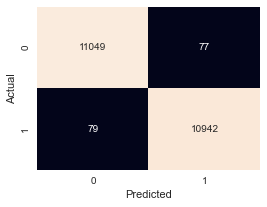

In [55]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictrfc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [56]:
#classification report 
rfc_report=classification_report(y_test,ypredictrfc)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11126
           1       0.99      0.99      0.99     11021

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [57]:
# performance matrices
rfc_met,rfc_test_accu,rfc_test_precision,rfc_test_recall,rfc_test_f1 = performance_matrices(rfc, X_test, y_test, ypredictrfc)
print ('Random_Forest_test_accu ',rfc_test_accu)
print ('Random_Forest_test_precision ',rfc_test_precision)
print ('Random_Forest_test_recall ',rfc_test_recall)
print ('Random_Forest_test_f1 ',rfc_test_f1)

Random_Forest_test_accu  0.99
Random_Forest_test_precision  0.99
Random_Forest_test_recall  0.99
Random_Forest_test_f1  0.99


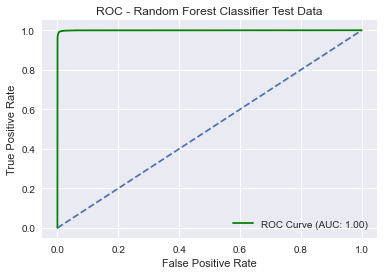

Random_Forest_test_auc 1.0


In [58]:
# ROC curve for test data
rfc_test_auc, rfc_test_fpr, rfc_test_tpr = draw_auc_roc(rfc, X_test, y_test, 'green', 'ROC - Random Forest Classifier Test Data')
print('Random_Forest_test_auc', round(rfc_test_auc,2))

Text(0.5, 1.0, 'Feature Ranking - Random Forest')

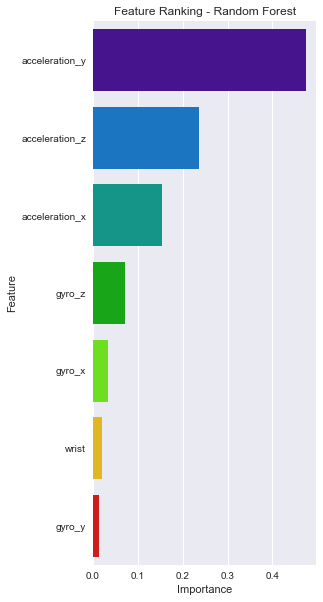

In [59]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : rfc.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - Random Forest', fontsize = 12)

# Naive Bayers

In [60]:
# Applying NavieBayers to walkrun datset
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [61]:
# predicting y values for x test using NB
ypredictnb=nb.predict(X_test)

In [62]:
# confusion matrix 
accuracy_score(y_test,ypredictnb)

0.957511175328487

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictnb)

array([[11019,   107],
       [  834, 10187]], dtype=int64)

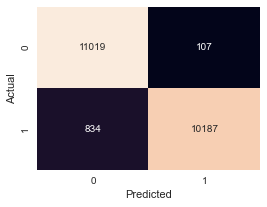

In [64]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictnb, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [65]:
nb_report=classification_report(y_test,ypredictnb)
print(nb_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11126
           1       0.99      0.92      0.96     11021

    accuracy                           0.96     22147
   macro avg       0.96      0.96      0.96     22147
weighted avg       0.96      0.96      0.96     22147



In [66]:
nb_met,nb_test_accu,nb_test_precision,nb_test_recall,nb_test_f1 = performance_matrices(nb, X_test, y_test, ypredictnb)
print ('Naive_Bayers_test_accu ',nb_test_accu)
print ('Naive_Bayers_test_precision ',nb_test_precision)
print ('Naive_Bayers_test_recall ',nb_test_recall)
print ('Naive_Bayers_test_f1 ',nb_test_f1)

Naive_Bayers_test_accu  0.96
Naive_Bayers_test_precision  0.99
Naive_Bayers_test_recall  0.92
Naive_Bayers_test_f1  0.96


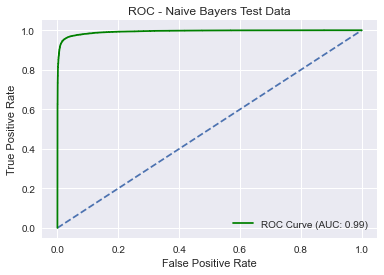

Naive_Bayers_test_auc 0.99


In [67]:
nb_test_auc, nb_test_fpr, nb_test_tpr = draw_auc_roc(nb, X_test, y_test, 'green', 'ROC - Naive Bayers Test Data')
print('Naive_Bayers_test_auc', round(nb_test_auc,2))

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [69]:
# predicting y values for x test using KNN
ypredictknn = knn.predict(X_test)

In [70]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypredictknn)

0.9876732740326003

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(y_test,ypredictknn)

array([[11059,    67],
       [  206, 10815]], dtype=int64)

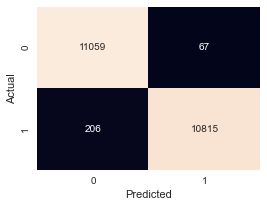

In [72]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictknn, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [73]:
knn_report=classification_report(y_test,ypredictknn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11126
           1       0.99      0.98      0.99     11021

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [74]:
knn_met,knn_test_accu,knn_test_precision,knn_test_recall,knn_test_f1 = performance_matrices(knn, X_test, y_test, ypredictknn)
print ('KNN_test_accu ',knn_test_accu)
print ('KNN_precision ',knn_test_precision)
print ('KNN_test_recall ',knn_test_recall)
print ('KNN_test_f1 ',knn_test_f1)

KNN_test_accu  0.99
KNN_precision  0.99
KNN_test_recall  0.98
KNN_test_f1  0.99


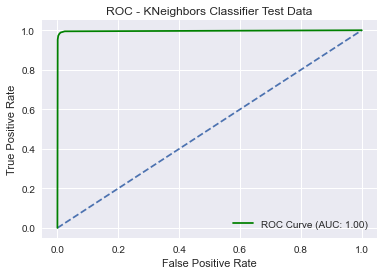

KNN_test_auc 1.0


In [75]:
knn_test_auc, knn_test_fpr, knn_test_tpr = draw_auc_roc(knn, X_test, y_test, 'green', 'ROC - KNeighbors Classifier Test Data')
print('KNN_test_auc', round(knn_test_auc,2))

# MLP

In [76]:
# Applying MLP to Wlakrun datset
from sklearn.neural_network import MLPClassifier
mlp =MLPClassifier(
    random_state = 7,
    hidden_layer_sizes=(30,20,10),
    max_iter=250
                    )
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=250, random_state=7)

In [77]:
# predicting y values for x test using MLP
ypredictmlp=mlp.predict(X_test)

In [78]:
# accuracy score
accuracy_score(y_test,ypredictmlp)

0.992820698062943

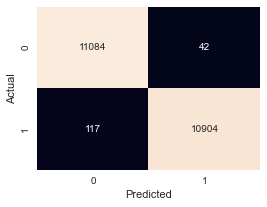

In [79]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictmlp, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [80]:
mlp_report=classification_report(y_test,ypredictmlp)
print(mlp_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11126
           1       1.00      0.99      0.99     11021

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [81]:
mlp_met,mlp_test_accu,mlp_test_precision,mlp_test_recall,mlp_test_f1 = performance_matrices(mlp, X_test, y_test, ypredictmlp)
print ('MLP_test_accu ',mlp_test_accu)
print ('MLP_precision ',mlp_test_precision)
print ('MLP_test_recall ',mlp_test_recall)
print ('MLP_test_f1 ',mlp_test_f1)

MLP_test_accu  0.99
MLP_precision  1.0
MLP_test_recall  0.99
MLP_test_f1  0.99


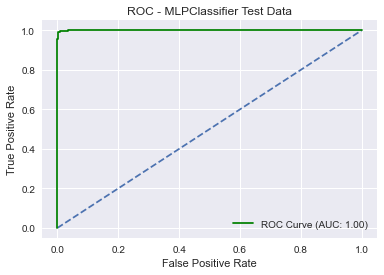

MLP_test_auc 1.0


In [82]:
mlp_test_auc, mlp_test_fpr, mlp_test_tpr = draw_auc_roc(mlp, X_test, y_test, 'green', 'ROC - MLPClassifier Test Data')
print('MLP_test_auc', round(mlp_test_auc,2))

# XGB Classifier

In [83]:
# Applying XGB Classifier to wlakrun dataset
from xgboost import XGBClassifier

In [84]:
xgb = XGBClassifier(
                 gamma=0.03,
                 max_depth=6,
                 learning_rate=0.8
)
xgb.fit(X_train,y_train)
ypredictxgb= xgb.predict(X_test)

[06:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
# accracy score
accuracy_score(y_test,ypredictxgb)

0.9930464622748002

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictxgb)

array([[11060,    66],
       [   88, 10933]], dtype=int64)

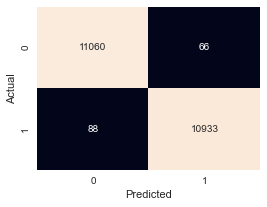

In [87]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictxgb, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [88]:
xgb_report=classification_report(y_test,ypredictxgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11126
           1       0.99      0.99      0.99     11021

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [89]:
xgb_met,xgb_test_accu,xgb_test_precision,xgb_test_recall,xgb_test_f1 = performance_matrices(xgb, X_test, y_test, ypredictxgb)
print ('XGB_test_accu ',xgb_test_accu)
print ('XGB_precision ',xgb_test_precision)
print ('XGB_test_recall ',xgb_test_recall)
print ('XGB_test_f1 ',xgb_test_f1)

XGB_test_accu  0.99
XGB_precision  0.99
XGB_test_recall  0.99
XGB_test_f1  0.99


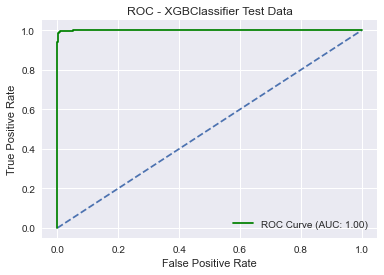

XGB_test_auc 1.0


In [90]:
xgb_test_auc, xgb_test_fpr, xgb_test_tpr = draw_auc_roc(xgb, X_test, y_test, 'green', 'ROC - XGBClassifier Test Data')
print('XGB_test_auc', round(xgb_test_auc,2))

Text(0.5, 1.0, 'Feature Ranking - XGBClassifier')

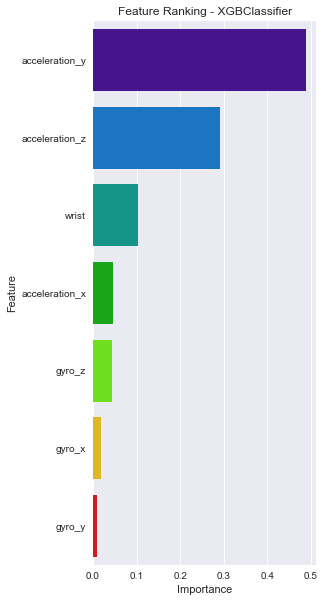

In [91]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : xgb.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - XGBClassifier', fontsize = 12)

# SVC

In [92]:
# Applying SVC to walkrun dataset
from sklearn.svm import SVC

svc=SVC(C=10,gamma=1.0,kernel='rbf', max_iter=500, probability = True)# c is 0.1 to 1000 and gamma 0.01 to 10

svc.fit(X_train,y_train)


SVC(C=10, gamma=1.0, max_iter=500, probability=True)

In [93]:
ypredictsvc = svc.predict(X_test)

In [94]:

accuracy_score(y_test,ypredictsvc)

0.9322255836004877

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictsvc)

array([[10123,  1003],
       [  498, 10523]], dtype=int64)

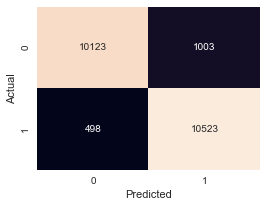

In [96]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictsvc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [97]:
svc_report=classification_report(y_test,ypredictsvc)
print(svc_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     11126
           1       0.91      0.95      0.93     11021

    accuracy                           0.93     22147
   macro avg       0.93      0.93      0.93     22147
weighted avg       0.93      0.93      0.93     22147



In [98]:
svc_met,svc_test_accu,svc_test_precision,svc_test_recall,svc_test_f1 = performance_matrices(svc, X_test, y_test, ypredictsvc)
print ('SVC_test_accu ',svc_test_accu)
print ('SVC_precision ',svc_test_precision)
print ('SVC_test_recall ',svc_test_recall)
print ('SVC_test_f1 ',svc_test_f1)

SVC_test_accu  0.93
SVC_precision  0.91
SVC_test_recall  0.95
SVC_test_f1  0.93


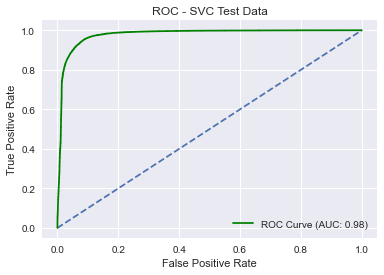

SVC_test_auc 0.98


In [99]:
svc_test_auc, svc_test_fpr, svc_test_tpr = draw_auc_roc(svc, X_test, y_test, 'green', 'ROC - SVC Test Data')
print('SVC_test_auc', round(svc_test_auc,2))

# Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gbc = GradientBoostingClassifier(
    loss='deviance',
    criterion='mse',
    learning_rate=0.25,
    n_estimators=200,
    subsample=0.50,
    max_features='sqrt',
    max_depth=16,
    verbose=0
)

In [102]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.25, max_depth=16,
                           max_features='sqrt', n_estimators=200,
                           subsample=0.5)

In [103]:
ypredictgbc=gbc.predict(X_test)

In [104]:
# Accuracy score
accuracy_score(y_test,ypredictgbc)

0.9934076850137716

In [105]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(y_test,ypredictgbc)

array([[11067,    59],
       [   87, 10934]], dtype=int64)

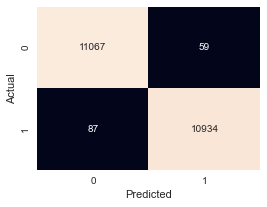

In [106]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictgbc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [107]:
gbc_report=classification_report(y_test,ypredictgbc)
print(gbc_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11126
           1       0.99      0.99      0.99     11021

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [108]:
gbc_met,gbc_test_accu,gbc_test_precision,gbc_test_recall,gbc_test_f1 = performance_matrices(gbc, X_test, y_test, ypredictgbc)
print ('GBC_test_accu ',gbc_test_accu)
print ('GBC_precision ',gbc_test_precision)
print ('GBC_test_recall ',gbc_test_recall)
print ('GBC_test_f1 ',gbc_test_f1)

GBC_test_accu  0.99
GBC_precision  0.99
GBC_test_recall  0.99
GBC_test_f1  0.99


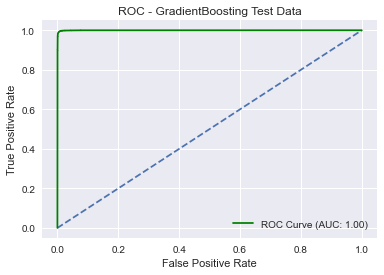

GradientBoosting_test_auc 1.0


In [109]:
gbc_test_auc, gbc_test_fpr, gbc_test_tpr = draw_auc_roc(gbc, X_test, y_test, 'green', 'ROC - GradientBoosting Test Data')
print('GradientBoosting_test_auc', round(gbc_test_auc,2))

Text(0.5, 1.0, 'Feature Ranking - Gradient Boosting')

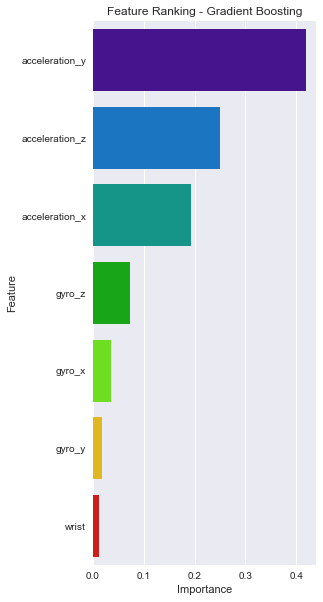

In [110]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : gbc.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - Gradient Boosting', fontsize = 12)

# Stochastic Gradient Descent

In [111]:
from sklearn.linear_model import SGDClassifier

In [112]:
sgdc=SGDClassifier(
    loss='squared_hinge',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [113]:
sgdc.fit(X_train,y_train)

SGDClassifier(alpha=0.25, eta0=0.5, learning_rate='adaptive',
              loss='squared_hinge', max_iter=200)

In [114]:
ypredictsgdc=sgdc.predict(X_test)

In [115]:
accuracy_score(y_test,ypredictsgdc)

0.8503183275387186

In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictsgdc)

array([[10994,   132],
       [ 3183,  7838]], dtype=int64)

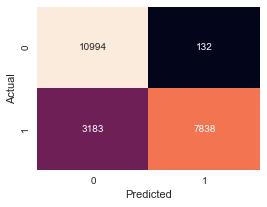

In [117]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictsgdc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [118]:
sgdc_report=classification_report(y_test,ypredictsgdc)
print(sgdc_report)

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     11126
           1       0.98      0.71      0.83     11021

    accuracy                           0.85     22147
   macro avg       0.88      0.85      0.85     22147
weighted avg       0.88      0.85      0.85     22147



In [119]:
sgdc_met,sgdc_test_accu,sgdc_test_precision,sgdc_test_recall,sgdc_test_f1 = performance_matrices(sgdc, X_test, y_test, ypredictsgdc)
print ('SGDC_test_accu ',sgdc_test_accu)
print ('SGDC_precision ',sgdc_test_precision)
print ('SGDC_test_recall ',sgdc_test_recall)
print ('SGDC_test_f1 ',sgdc_test_f1)

SGDC_test_accu  0.85
SGDC_precision  0.98
SGDC_test_recall  0.71
SGDC_test_f1  0.83


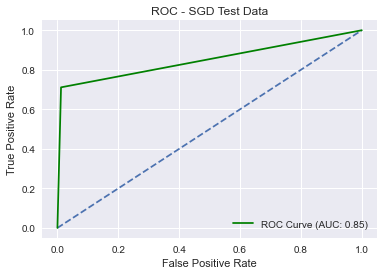

SGD_test_auc 0.85


In [120]:
sgdc_test_auc, sgdc_test_fpr, sgdc_test_tpr = draw_auc_roc_1(sgdc, X_test, y_test, 'green', 'ROC - SGD Test Data')
print('SGD_test_auc', round(sgdc_test_auc,2))

# LGBMClassifier

In [121]:
from lightgbm import LGBMClassifier

In [122]:
lgbm=LGBMClassifier(
    boosting_type='gbdt',
    max_depth=16,
    learning_rate=0.25,
    num_leaves=64
)

In [123]:
lgbm.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.25, max_depth=16, num_leaves=64)

In [124]:
ypredictlgbm=lgbm.predict(X_test)

In [125]:
accuracy_score(y_test,ypredictlgbm)

0.9934979906985145

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictlgbm)

array([[11063,    63],
       [   81, 10940]], dtype=int64)

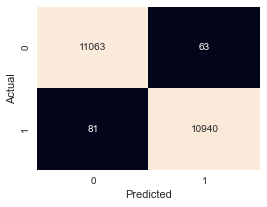

In [127]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictlgbm, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [128]:
lgbm_report=classification_report(y_test,ypredictlgbm)
print(lgbm_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11126
           1       0.99      0.99      0.99     11021

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [129]:
lgbm_met,lgbm_test_accu,lgbm_test_precision,lgbm_test_recall,lgbm_test_f1 = performance_matrices(lgbm, X_test, y_test, ypredictlgbm)
print ('LGBM_test_accu ',lgbm_test_accu)
print ('LGBM_precision ',lgbm_test_precision)
print ('LGBM_test_recall ',lgbm_test_recall)
print ('LGBM_test_f1 ',lgbm_test_f1)

LGBM_test_accu  0.99
LGBM_precision  0.99
LGBM_test_recall  0.99
LGBM_test_f1  0.99


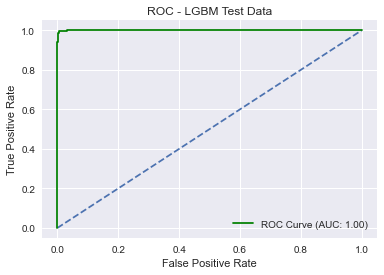

LGBM_test_auc 1.0


In [130]:
lgbm_test_auc, lgbm_test_fpr, lgbm_test_tpr = draw_auc_roc(lgbm, X_test, y_test, 'green', 'ROC - LGBM Test Data')
print('LGBM_test_auc', round(lgbm_test_auc,2))

In [131]:
lgbm.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

Text(0.5, 1.0, 'Feature Ranking - Lite GB')

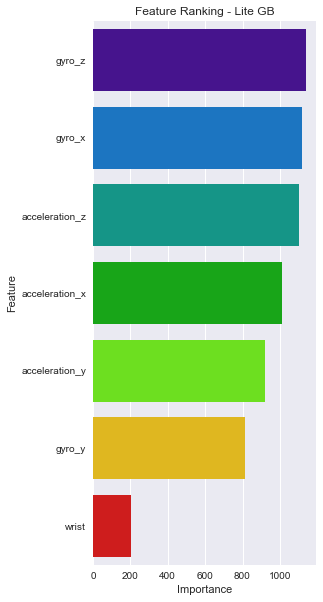

In [132]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : lgbm.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - Lite GB', fontsize = 12)

# Cat Boost

In [133]:
from catboost import CatBoostClassifier

In [134]:
cb=CatBoostClassifier(silent=True)
cb.fit(X_train,y_train)

In [135]:
ypredictcb=cb.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictcb)

array([[11077,    49],
       [   92, 10929]], dtype=int64)

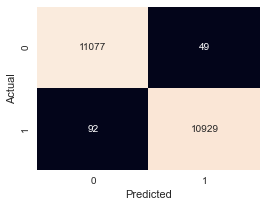

In [137]:
# confusion matrix with graphical representation
confusion_matrix = pd.crosstab(y_test,ypredictcb, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False,fmt="d")
plt.show()

In [138]:
cb_report=classification_report(y_test,ypredictcb)
print(cb_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11126
           1       1.00      0.99      0.99     11021

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [139]:
cb_met,cb_test_accu,cb_test_precision,cb_test_recall,cb_test_f1 = performance_matrices(cb, X_test, y_test, ypredictcb)
print ('CatBoost_test_accu ',cb_test_accu)
print ('CatBoost_precision ',cb_test_precision)
print ('CatBoost_test_recall ',cb_test_recall)
print ('CatBoost_test_f1 ',cb_test_f1)

CatBoost_test_accu  0.99
CatBoost_precision  1.0
CatBoost_test_recall  0.99
CatBoost_test_f1  0.99


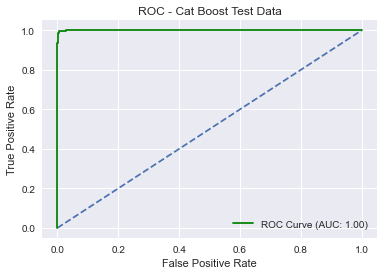

Cat_Boost_test_auc 1.0


In [140]:
cb_test_auc, cb_test_fpr, cb_test_tpr = draw_auc_roc(cb, X_test, y_test, 'green', 'ROC - Cat Boost Test Data')
print('Cat_Boost_test_auc', round(cb_test_auc,2))

Text(0.5, 1.0, 'Feature Ranking - Cat Boost')

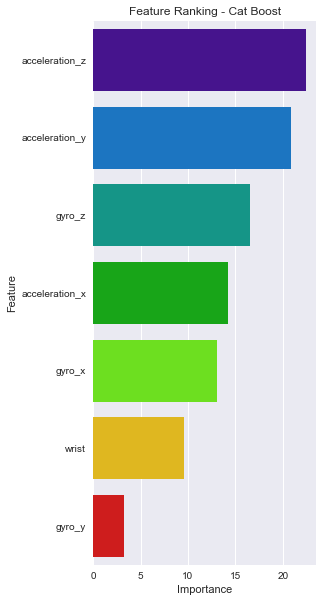

In [141]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : cb.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - Cat Boost', fontsize = 12)

# Final Model Comparison 

In [142]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
test_perf_data = pd.DataFrame({'Logistic':[lr_test_accu,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
                     'RF':[rfc_test_accu,rfc_test_auc,rfc_test_recall,rfc_test_precision,rfc_test_f1], 
                     'KNN':[knn_test_accu,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
                     'MLP':[mlp_test_accu,mlp_test_auc,mlp_test_recall,mlp_test_precision,mlp_test_f1],
                     'XGB':[xgb_test_accu,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
                     'SVC':[svc_test_accu,svc_test_auc,svc_test_recall,svc_test_precision,svc_test_f1],
                     'GBC':[gbc_test_accu,gbc_test_auc,gbc_test_recall,gbc_test_precision,gbc_test_f1],
                     #'SGDC':[sgdc_test_accu,sgdc_test_auc,sgdc_test_recall,sgdc_test_precision,sgdc_test_f1],
                     'LGBM':[lgbm_test_accu,lgbm_test_auc,lgbm_test_recall,lgbm_test_precision,lgbm_test_f1],
                     'CB':[cb_test_accu,cb_test_auc,cb_test_recall,cb_test_precision,cb_test_f1],
                     },index=index)
round(test_perf_data,2)

,Logistic,RF,KNN,MLP,XGB,SVC,GBC,LGBM,CB
Accuracy,0.86,0.99,0.99,0.99,0.99,0.93,0.99,0.99,0.99
AUC,0.93,1.00,1.00,1.00,1.00,0.98,1.00,1.00,1.00
Recall,0.81,0.99,0.98,0.99,0.99,0.95,0.99,0.99,0.99
Precision,0.90,0.99,0.99,1.00,0.99,0.91,0.99,0.99,1.00
F1 Score,0.85,0.99,0.99,0.99,0.99,0.93,0.99,0.99,0.99


# Model Performance

Text(0.5, 1.0, 'Model Performance')

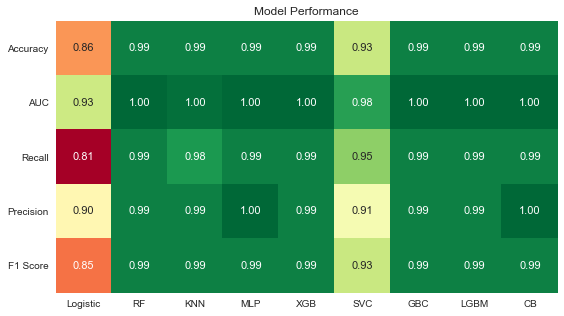

In [143]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(test_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":11}, cbar = False)
plt.yticks(rotation=0) 
plt.title('Model Performance')

# Final Model ROC Curve Comparison

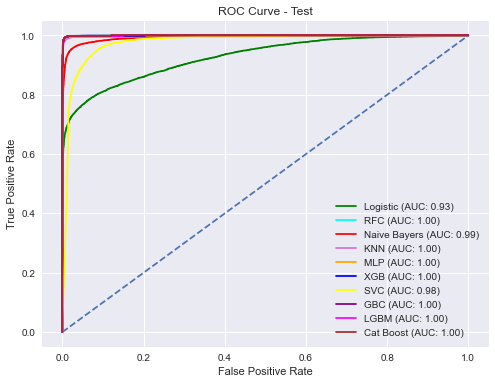

In [144]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='green',label='Logistic (AUC: %0.2f)'%lr_test_auc)
plt.plot(rfc_test_fpr,rfc_test_tpr,color='cyan',label='RFC (AUC: %0.2f)'%rfc_test_auc)
plt.plot(nb_test_fpr,nb_test_tpr,color='red',label='Naive Bayers (AUC: %0.2f)'%nb_test_auc)
plt.plot(knn_test_fpr,knn_test_tpr,color='orchid',label='KNN (AUC: %0.2f)'%knn_test_auc)
plt.plot(mlp_test_fpr,mlp_test_tpr,color='orange',label='MLP (AUC: %0.2f)'%mlp_test_auc)
plt.plot(xgb_test_fpr,xgb_test_tpr,color='blue',label='XGB (AUC: %0.2f)'%xgb_test_auc)
plt.plot(svc_test_fpr,svc_test_tpr,color='yellow',label='SVC (AUC: %0.2f)'%svc_test_auc)
plt.plot(gbc_test_fpr,gbc_test_tpr,color='purple',label='GBC (AUC: %0.2f)'%gbc_test_auc)
#plt.plot(sgdc_test_fpr,sgdc_test_tpr,color='brown',label='SGDC (AUC: %0.2f)'%sgdc_test_auc)
plt.plot(lgbm_test_fpr,lgbm_test_tpr,color='magenta',label='LGBM (AUC: %0.2f)'%lgbm_test_auc)
plt.plot(cb_test_fpr,cb_test_tpr,color='brown',label='Cat Boost (AUC: %0.2f)'%cb_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")

Conclusion : Dataset is good, we got 99 % accuracy score and we built a good model.
some insights from this,
* The accealration and gyro values are low the activity should be walking (0)
* The accealration and gyro values are high the activity should be running (1)
* For classification such as walk or run the model can be overfit